<a href="https://colab.research.google.com/github/JielingChen/Data_Science_Practice_Projects/blob/main/hw2_document_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('state_union')

from nltk.corpus import state_union, stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

* Use the state of the union addresses to create a term document matrix. Perform stemming and remove the alphabets and stop words.  

**Answer:**

In [ ]:
def create_term_document_matrix_df(corpus):
    fileids = corpus.fileids()
    list_of_documents = [corpus.raw(fileid) for fileid in fileids]

    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()

    vocab = set()
    tdm = defaultdict(lambda: [0] * len(list_of_documents))

    for i, document in enumerate(list_of_documents):
        words = nltk.word_tokenize(document.lower())
        # remove stop words and punctuation
        words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
        freq_dist = FreqDist(words)
        for word, freq in freq_dist.items():
            vocab.add(word)
            tdm[word][i] = freq

    term_document_matrix_df = pd.DataFrame(tdm, index=fileids)

    return term_document_matrix_df

In [ ]:
# create the term document matrix of state union corpus
state_union_tdm_df = create_term_document_matrix_df(state_union)
print("The state of the union addresses term document matrix: \n")
print(state_union_tdm_df)

The state of the union addresses term document matrix: 

                 presid  harri  truman  address  joint  session  congress  \
1945-Truman.txt       3      1       1        1      1        1         4   
1946-Truman.txt      10      1       1        2      0        0        75   
1947-Truman.txt      10      1       1        0      2        0        28   
1948-Truman.txt       4      1       1        0      0        2        15   
1949-Truman.txt       5      1       1        0      0        1        18   
...                 ...    ...     ...      ...    ...      ...       ...   
2002-GWBush.txt       4      0       0        2      1        1        10   
2003-GWBush.txt       4      0       0        3      1        2        12   
2004-GWBush.txt       5      0       0        2      1        1        13   
2005-GWBush.txt       7      0       0        1      1        1        16   
2006-GWBush.txt      12      0       1        7      1        1        15   

                 a

* Let $p$ and $n$ stand for the number of words and documents, respectively. After preprocessing as stated above, what is $p,n$?

**Answer:** p is 7284 and n is 65.

* Compute the $\ell_2$-norm distance  between the documents.  

**Answer:**

In [ ]:
from itertools import combinations

In [ ]:
# transform tdm into tfidf matrix
tfidf_transformer = TfidfTransformer()
state_union_tfidf = tfidf_transformer.fit_transform(state_union_tdm_df)

state_union_tfidf_df = pd.DataFrame(state_union_tfidf.toarray(),
                                    index=state_union_tdm_df.index, columns=state_union_tdm_df.columns)

In [ ]:
print(state_union_tfidf_df)

                   presid     harri    truman   address     joint   session  \
1945-Truman.txt  0.033377  0.026891  0.022854  0.014669  0.014439  0.013154   
1946-Truman.txt  0.010299  0.002489  0.002116  0.002716  0.000000  0.000000   
1947-Truman.txt  0.047589  0.011503  0.009776  0.000000  0.012353  0.000000   
1948-Truman.txt  0.022811  0.013784  0.011714  0.000000  0.000000  0.013485   
1949-Truman.txt  0.040731  0.019690  0.016734  0.000000  0.000000  0.009631   
...                   ...       ...       ...       ...       ...       ...   
2002-GWBush.txt  0.017966  0.000000  0.000000  0.011844  0.005829  0.005310   
2003-GWBush.txt  0.018283  0.000000  0.000000  0.018079  0.005932  0.010808   
2004-GWBush.txt  0.020544  0.000000  0.000000  0.010835  0.005333  0.004858   
2005-GWBush.txt  0.030535  0.000000  0.000000  0.005751  0.005661  0.005157   
2006-GWBush.txt  0.050652  0.000000  0.008671  0.038957  0.005478  0.004991   

                 congress     april   speaker    me

In [ ]:
def compute_l2_norm_distance(df):
    l2_norm_distances = defaultdict(float)
    for doc1, doc2 in combinations(df.index, 2):
        vector1 = df.loc[doc1].values
        vector2 = df.loc[doc2].values
        distance = np.sqrt(np.sum(np.square(vector1 - vector2)))
        l2_norm_distances[(doc1, doc2)] = distance

    return l2_norm_distances

In [ ]:
# compute the l2-norm distances
l2_norm_distances = compute_l2_norm_distance(state_union_tfidf_df)

In [ ]:
for (doc1, doc2), distance in l2_norm_distances.items():
    print(f"The l2-norm distance between {doc1} and {doc2} is {distance:.4f}")

The l2-norm distance between 1945-Truman.txt and 1946-Truman.txt is 1.2168
The l2-norm distance between 1945-Truman.txt and 1947-Truman.txt is 1.1479
The l2-norm distance between 1945-Truman.txt and 1948-Truman.txt is 1.1097
The l2-norm distance between 1945-Truman.txt and 1949-Truman.txt is 1.1646
The l2-norm distance between 1945-Truman.txt and 1950-Truman.txt is 1.1177
The l2-norm distance between 1945-Truman.txt and 1951-Truman.txt is 1.1227
The l2-norm distance between 1945-Truman.txt and 1953-Eisenhower.txt is 1.1487
The l2-norm distance between 1945-Truman.txt and 1954-Eisenhower.txt is 1.1872
The l2-norm distance between 1945-Truman.txt and 1955-Eisenhower.txt is 1.1501
The l2-norm distance between 1945-Truman.txt and 1956-Eisenhower.txt is 1.1664
The l2-norm distance between 1945-Truman.txt and 1957-Eisenhower.txt is 1.1361
The l2-norm distance between 1945-Truman.txt and 1958-Eisenhower.txt is 1.1239
The l2-norm distance between 1945-Truman.txt and 1959-Eisenhower.txt is 1.11

* Apply K-means for $K=1,\cdots,20$. Plot within-cluster sum of squares (WCSS) as a function of $K$. Use this graph to decide on the appropriate number of clusters.  

**Answer:**
The appropriate number of clusters is 3 as the decrease of WCSS slows down when K is larger than 3.

In [ ]:
inertia = []
for k in range(1, 21):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(state_union_tfidf_df)
    inertia.append(km.inertia_)

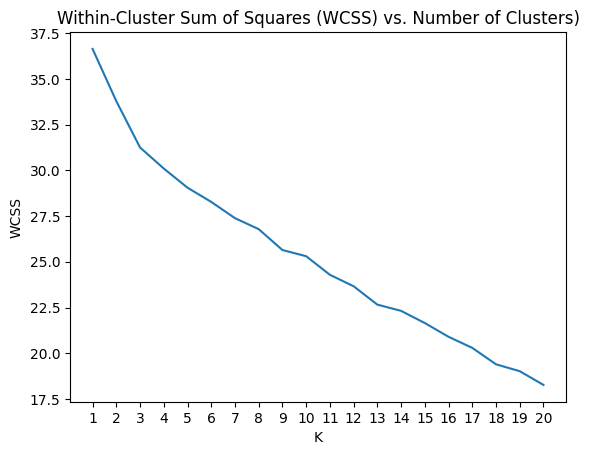

In [ ]:
plt.plot(range(1, 21), inertia)
plt.title('Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters)')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.xticks(range(1, 21))
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(state_union_tfidf_df)

In [ ]:
state_union_tfidf_df['Cluster_Label'] = km.labels_
for cluster in range(3):
    print(f"Cluster {cluster + 1}:")
    cluster_docs = state_union_tfidf_df[state_union_tfidf_df['Cluster_Label'] == cluster].index
    for doc in cluster_docs:
        year, president = doc.split('-')[0], doc.split('-')[1].split('.')[0]
        print(f"{president}, {year}")
    print("\n")

Cluster 1:
Truman, 1945
Truman, 1946
Truman, 1947
Truman, 1948
Truman, 1949
Truman, 1950
Truman, 1951
Eisenhower, 1953
Eisenhower, 1954
Eisenhower, 1955
Eisenhower, 1956
Eisenhower, 1957
Eisenhower, 1958
Eisenhower, 1959
Eisenhower, 1960
Kennedy, 1961
Kennedy, 1962
Johnson, 1963
Kennedy, 1963
Johnson, 1965
Ford, 1975
Ford, 1977
Carter, 1979
Carter, 1980


Cluster 2:
Johnson, 1964
Johnson, 1965
Johnson, 1966
Johnson, 1967
Johnson, 1968
Johnson, 1969
Nixon, 1970
Nixon, 1971
Nixon, 1972
Nixon, 1973
Nixon, 1974
Ford, 1976
Carter, 1978
Reagan, 1981
Reagan, 1982
Reagan, 1983
Reagan, 1984
Reagan, 1985
Reagan, 1986
Reagan, 1987
Reagan, 1988
Bush, 1989
Bush, 1990
Bush, 1991
Bush, 1991
Bush, 1992
Clinton, 1993
Clinton, 1994
Clinton, 1995
Clinton, 1996
Clinton, 1997
Clinton, 1998
Clinton, 1999
Clinton, 2000
GWBush, 2003


Cluster 3:
GWBush, 2001
GWBush, 2001
GWBush, 2002
GWBush, 2004
GWBush, 2005
GWBush, 2006




* Create a heatmap of the dissimilarity by putting documents that are in the same cluster next to each other.  

**Answer:**

In [ ]:
dissimilarity_df = pd.DataFrame(0, index=state_union_tfidf_df.index,
                                columns=state_union_tfidf_df.index)

for (doc1, doc2), distance in l2_norm_distances.items():
    dissimilarity_df.loc[doc1, doc2] = distance
    dissimilarity_df.loc[doc2, doc1] = distance

dissimilarity_df

,1945-Truman.txt,1946-Truman.txt,1947-Truman.txt,1948-Truman.txt,1949-Truman.txt,1950-Truman.txt,1951-Truman.txt,1953-Eisenhower.txt,1954-Eisenhower.txt,1955-Eisenhower.txt,...,1998-Clinton.txt,1999-Clinton.txt,2000-Clinton.txt,2001-GWBush-1.txt,2001-GWBush-2.txt,2002-GWBush.txt,2003-GWBush.txt,2004-GWBush.txt,2005-GWBush.txt,2006-GWBush.txt
1945-Truman.txt,0.000000,1.216845,1.147884,1.109652,1.164563,1.117690,1.122674,1.148726,1.187247,1.150059,...,1.182527,1.186614,1.201490,1.276212,1.213415,1.241675,1.193085,1.235590,1.223996,1.182743
1946-Truman.txt,1.216845,0.000000,0.913435,0.935859,0.975050,0.942205,1.141004,0.929565,0.904981,0.903804,...,1.126680,1.104505,1.137430,1.216605,1.264042,1.264797,1.161466,1.213042,1.207181,1.211112
1947-Truman.txt,1.147884,0.913435,0.000000,0.903407,0.923331,0.917455,1.050806,0.889581,0.938361,0.892558,...,1.118597,1.113398,1.145962,1.230614,1.246920,1.253328,1.166651,1.210362,1.193199,1.185713
1948-Truman.txt,1.109652,0.935859,0.903407,0.000000,0.857221,0.818660,1.018758,0.938024,0.923575,0.858812,...,1.077746,1.071211,1.086672,1.200105,1.223045,1.225532,1.122422,1.181872,1.155469,1.148459
1949-Truman.txt,1.164563,0.975050,0.923331,0.857221,0.000000,0.818903,1.067047,0.949838,0.936248,0.900241,...,1.092784,1.075211,1.110839,1.206981,1.250876,1.240210,1.150004,1.194712,1.167191,1.175209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-GWBush.txt,1.241675,1.264797,1.253328,1.225532,1.240210,1.224446,1.221949,1.237039,1.240271,1.229783,...,1.096392,1.127540,1.168299,0.746117,0.817240,0.000000,1.128415,0.708582,0.734368,0.741893
2003-GWBush.txt,1.193085,1.161466,1.166651,1.122422,1.150004,1.121563,1.131654,1.151267,1.140501,1.128077,...,1.023469,1.050093,1.068788,1.200180,1.110822,1.128415,0.000000,1.023743,1.075336,1.082313
2004-GWBush.txt,1.235590,1.213042,1.210362,1.181872,1.194712,1.173574,1.197943,1.195551,1.192311,1.169894,...,1.020141,1.039811,1.077752,0.736172,0.912117,0.708582,1.023743,0.000000,0.704378,0.718696
2005-GWBush.txt,1.223996,1.207181,1.193199,1.155469,1.167191,1.130116,1.180396,1.172676,1.163778,1.155084,...,1.027151,1.043776,1.093701,0.749476,0.925406,0.734368,1.075336,0.704378,0.000000,0.686809


In [ ]:
sorted_labels = state_union_tfidf_df['Cluster_Label'].sort_values().index
dissimilarity_df_sorted = dissimilarity_df.loc[sorted_labels, sorted_labels]

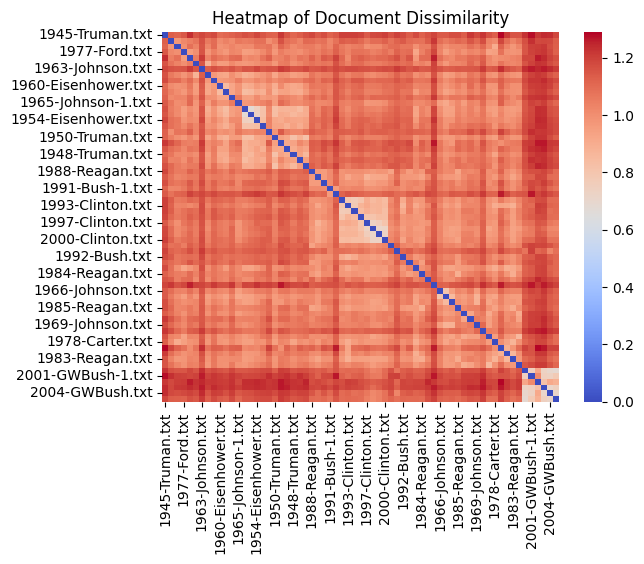

In [ ]:
sns.heatmap(dissimilarity_df_sorted, cmap='coolwarm', annot=False)
plt.title('Heatmap of Document Dissimilarity')
plt.show()